In [94]:
import pandas as pd
import numpy as np

In [95]:
path = '/nfs-data/Glucose/SW1-2'

In [96]:
data_raw = pd.read_csv(path+"/data/KoGES_KUGH_0727.csv")

In [97]:
data_raw = round(data_raw,2)
data_raw

,sex,age,Height,Weight,waist,hip,bmi,sys,dia,PR,...,Cr_RB,fu_exam,fu_dm,fu_FBS,fu_Hba1c,fu_dmdrug,fu_dmdiag,fu_dmtreat,futime,progress_DM
0,2,44,152.9,58.0,87.07,97.03,24.81,100.0,65.0,69.33,...,0.47,201602,0,74.0,5.5,0.0,0.0,0.0,14.50,0
1,1,55,169.1,62.2,87.33,89.00,21.75,117.0,88.0,60.00,...,0.75,201105,1,132.0,6.2,1.0,1.0,1.0,1.91,1
2,2,55,159.0,63.7,97.00,95.70,25.20,121.0,83.0,60.00,...,0.49,201510,0,104.0,6.2,0.0,0.0,0.0,2.42,0
3,1,65,155.9,60.6,80.00,96.50,24.93,111.0,64.0,68.00,...,0.85,200705,1,109.0,6.6,0.0,0.0,0.0,2.00,1
4,2,74,146.7,45.7,79.00,89.30,21.24,120.0,77.0,60.00,...,0.77,201509,0,89.0,5.6,0.0,0.0,0.0,2.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350,2,67,149.2,50.8,79.23,87.83,22.82,125.0,69.0,52.00,...,0.60,201609,0,92.0,5.4,0.0,0.0,0.0,2.25,0
7351,2,70,151.2,47.0,69.77,82.13,20.56,128.0,79.0,52.00,...,0.86,201105,0,100.0,5.8,0.0,0.0,0.0,1.33,0
7352,2,68,149.8,59.1,83.20,94.00,26.34,121.0,78.0,50.00,...,0.44,201411,1,89.0,5.9,1.0,1.0,1.0,5.83,1
7353,2,69,156.8,73.8,102.00,99.40,30.02,102.0,67.0,66.00,...,0.71,200708,1,81.0,6.1,1.0,0.0,1.0,1.91,1


In [98]:
data_raw['progress_DM'].value_counts()

0    6159
1    1196
Name: progress_DM, dtype: int64

In [99]:
data_raw.isna().sum(axis=1)

0       5
1       4
2       0
3       4
4       0
       ..
7350    1
7351    1
7352    3
7353    3
7354    4
Length: 7355, dtype: int64

# missing rate 

In [19]:
pd.set_option('display.max_row', 500)

In [20]:
missing_rate = round((data_raw.isna().sum()/data_raw.shape[0])*100,2)
missing_rate = missing_rate.to_dict()
pd.DataFrame(sorted(missing_rate.items(),reverse=True,key = lambda item: item[1]))

,0,1
0,Education,40.60
1,HabitualSnore,17.78
2,snore,17.24
3,SleepDuration,17.02
4,htntreat,14.60
5,insomnia,14.17
6,dmtreat,8.06
7,fu_dmdrug,4.72
8,sk_m,4.32
9,lean_mass,4.32


# drop_feature 

In [100]:
drop_feature = ['HabitualSnore','snore','SleepDuration','htntreat','insomnia','dmdiag','dmtreat','dmdrug','fu_dmdrug', 'fu_dmdiag', 'fu_dmtreat','fu_exam', 'fu_dm', 'fu_FBS', 'fu_Hba1c', 'futime','Education']
# missing rate > 10 추가 변수 
#'HabitualSnore','snore','SleepDuration','htntreat','insomnia',

In [101]:
drop_data = data_raw.drop(columns=drop_feature)
drop_data.shape

(7355, 44)

In [63]:
data_raw.shape

(7355, 61)

In [64]:
#drop_data.describe().T.reset_index(drop=0)

# 변수 분포 확인 # 정규성 검정

In [65]:
import scipy.stats as stats
import matplotlib.pyplot as plt

sex


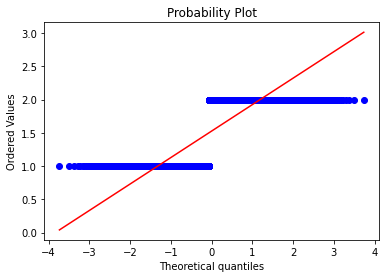

age


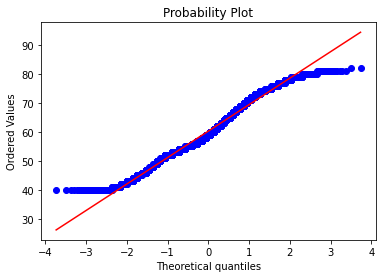

Height


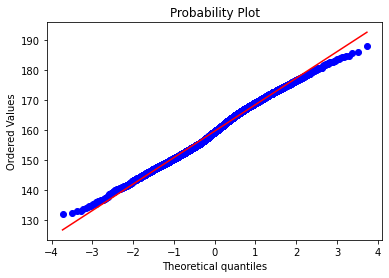

Weight


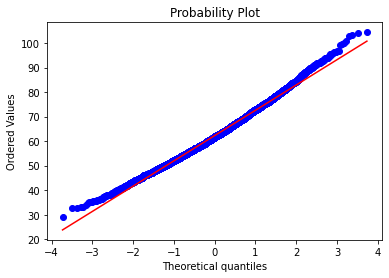

waist


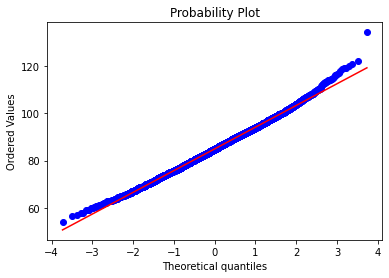

hip


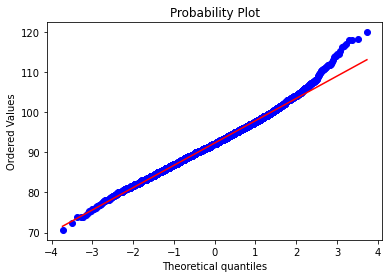

bmi


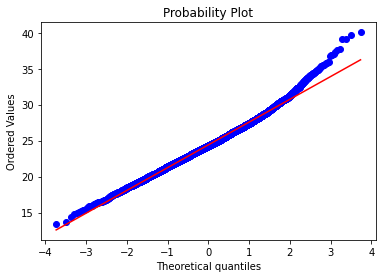

sys


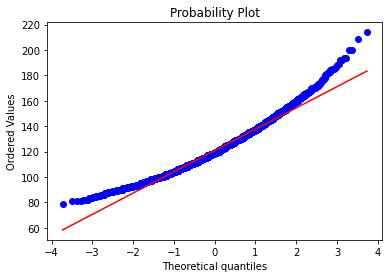

dia


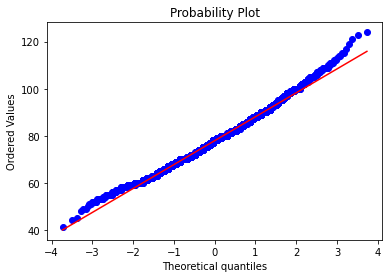

PR


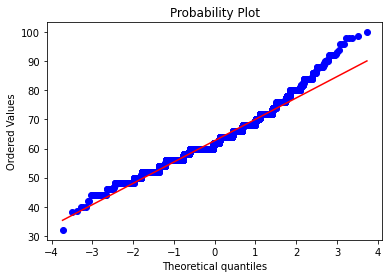

sk_m


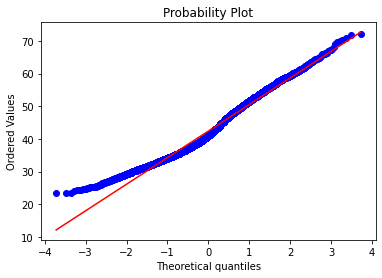

lean_mass


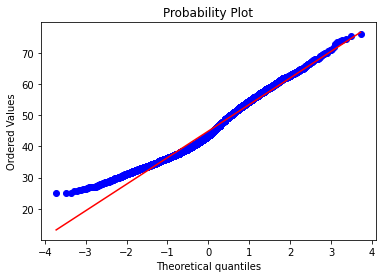

fat_b


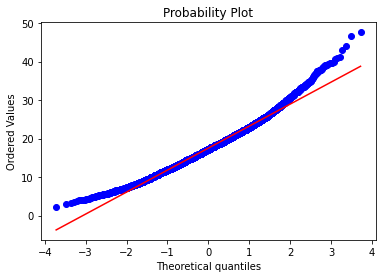

fat_p


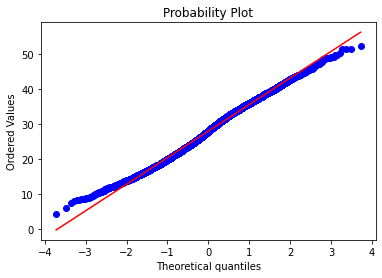

fat_ab


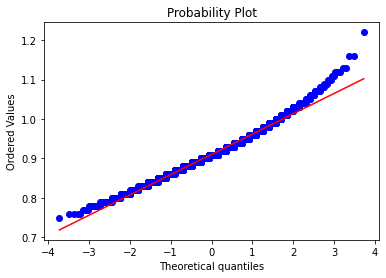

obesity_p


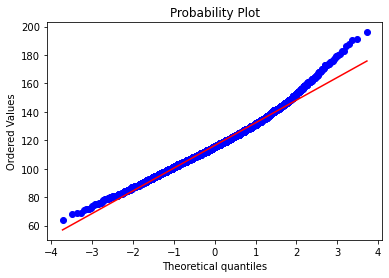

HTN_FH


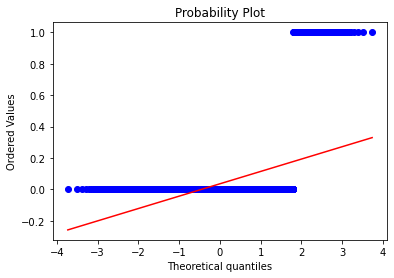

DM_FH


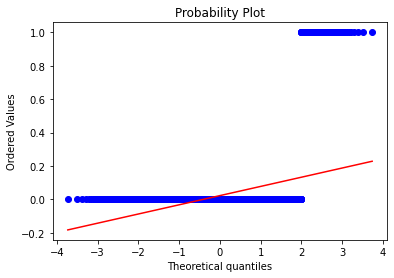

htndiag


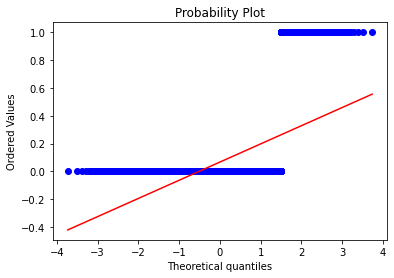

lipdiag


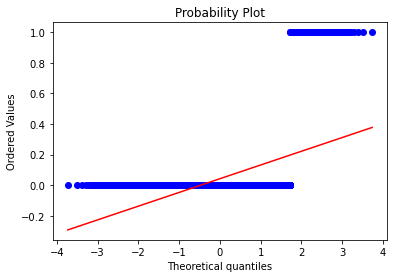

htndrug


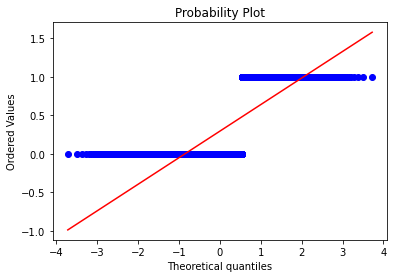

lipdrug


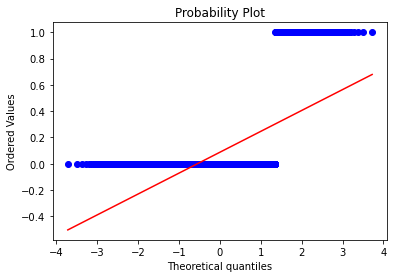

exercise


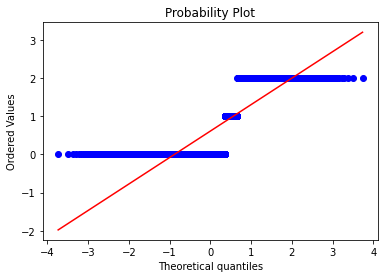

alcohol_amt


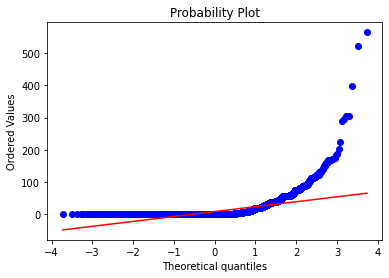

PPY


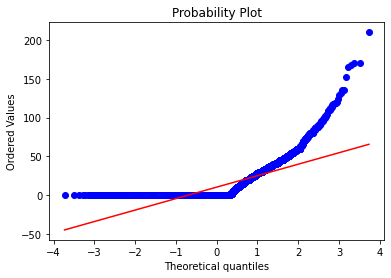

drink


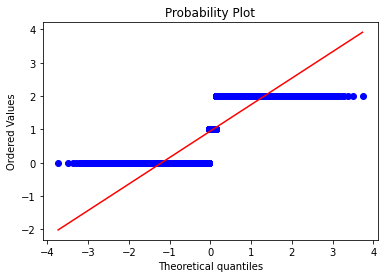

smoke


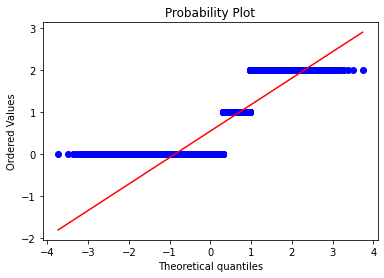

Marry


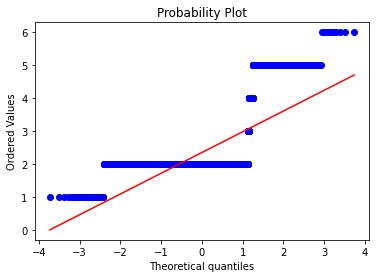

Income


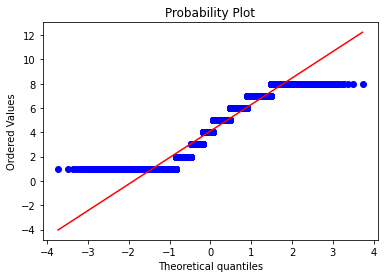

FBS


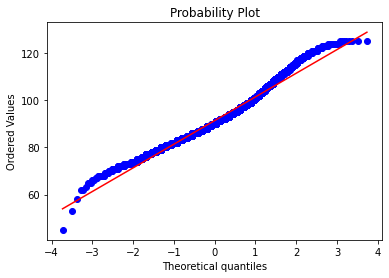

Hba1c


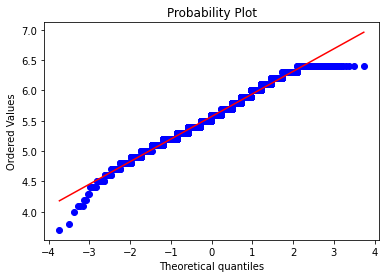

F_insulin


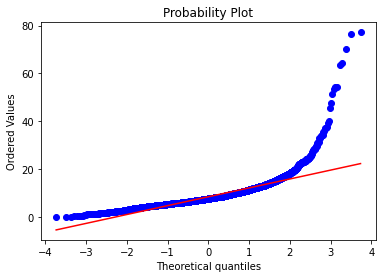

WBC


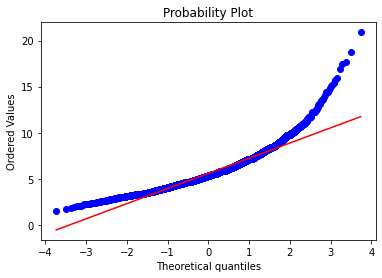

Hb


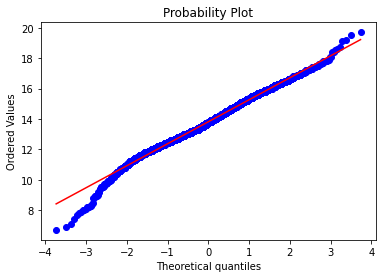

Plt


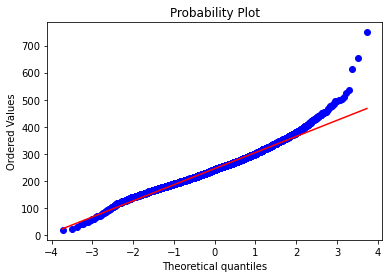

TC


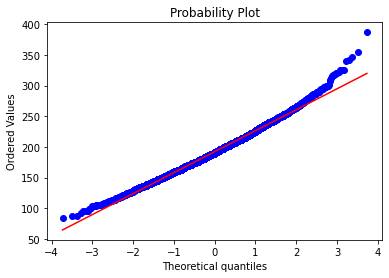

Tg


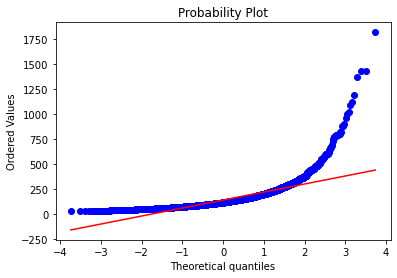

HDL


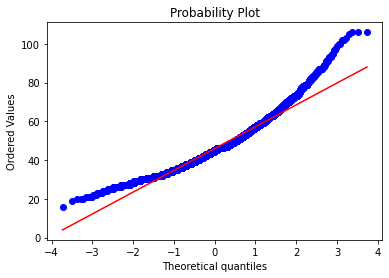

AST


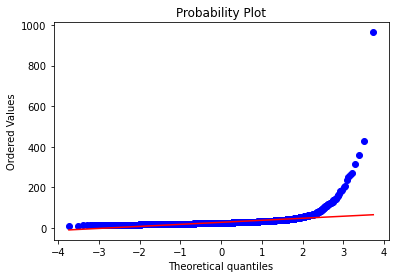

ALT


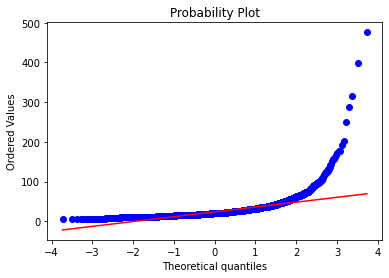

Cr_1650


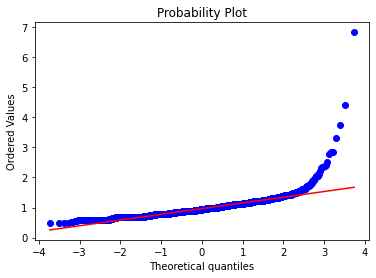

Cr_1800


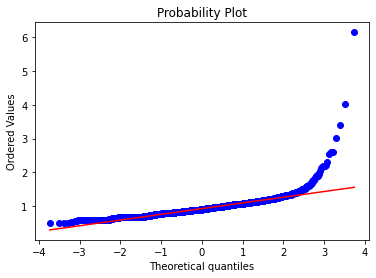

Cr_RB


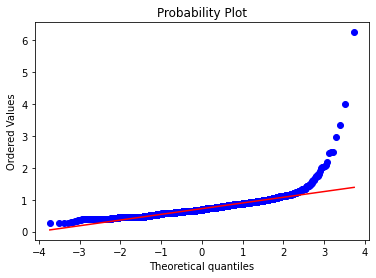

progress_DM


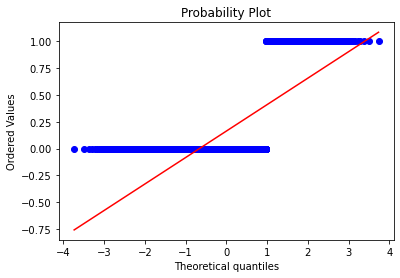

In [43]:
normal = []
for i in range(drop_data.shape[1]):
    columns = drop_data.columns[i]
    print(columns)
    data = drop_data[columns].dropna()
    stats.probplot(data, plot=plt)
    plt.show()
    


In [80]:
scipy.stats.kstest(drop_data['FBS'].dropna(),'norm')[1]

0.0

In [114]:
import scipy.stats
# p >.05이면 각 집단의 자료가 정규성을 크게 벗어난다고 보기 어려움 = 정규성을 만족 

normal = []
for i in range(drop_data.shape[1]):
    columns = drop_data.columns[i]
    data = drop_data[columns].dropna().values
    #scipy.stats.kstest(data,'norm')
    #print(columns)
    normal.append(round(scipy.stats.shapiro(data)[1],5))
    #normal.append(scipy.stats.kstest(data,'norm')[1])
normal_data = pd.DataFrame(normal,index=drop_data.columns.values).reset_index(drop=0).sort_values(by=[0])


/home/ehkang/anaconda3/envs/kang/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [115]:
normal_data

,index,0
0,sex,0.0
24,PPY,0.0
25,drink,0.0
26,smoke,0.0
27,Marry,0.0
28,Income,0.0
29,FBS,0.0
30,Hba1c,0.0
31,F_insulin,0.0
23,alcohol_amt,0.0


In [48]:
import matplotlib.pyplot as plt

columns = drop_data.columns

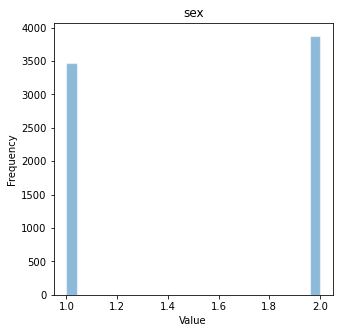

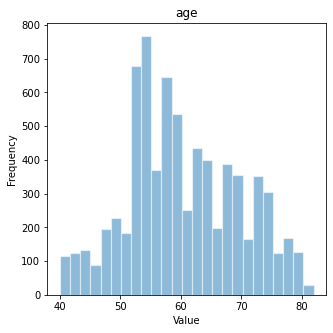

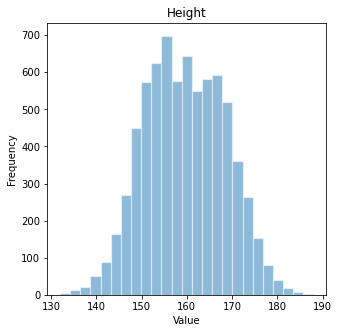

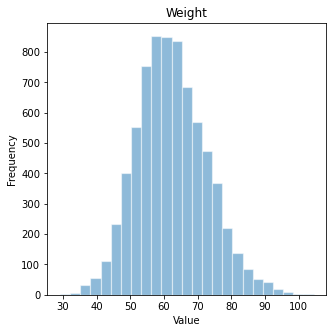

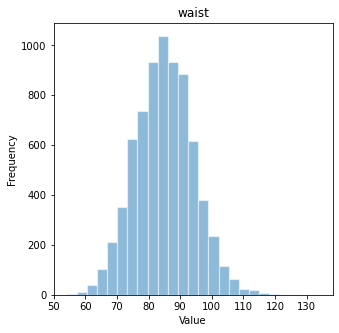

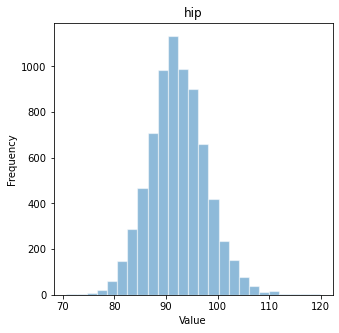

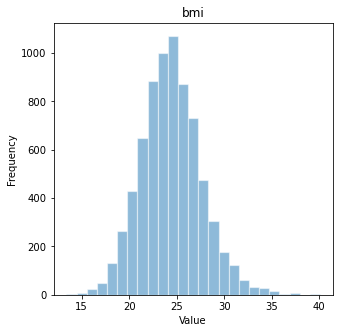

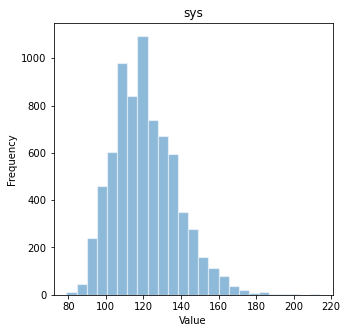

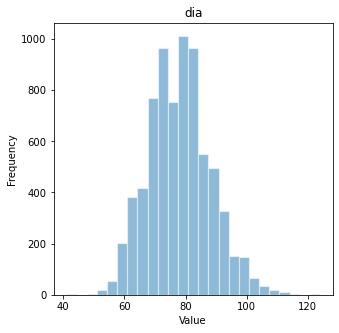

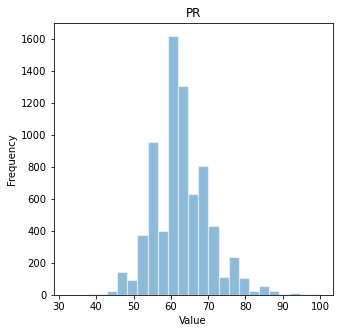

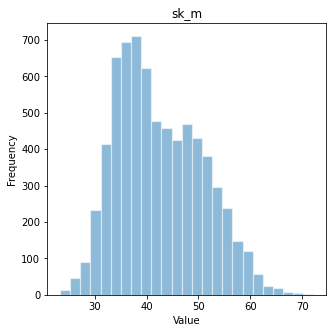

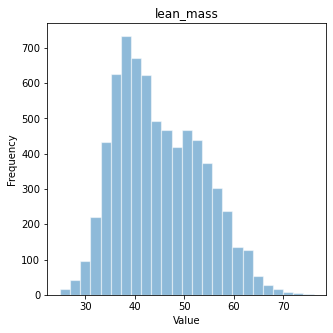

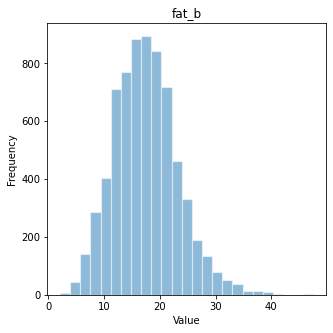

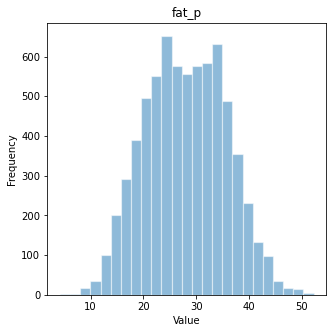

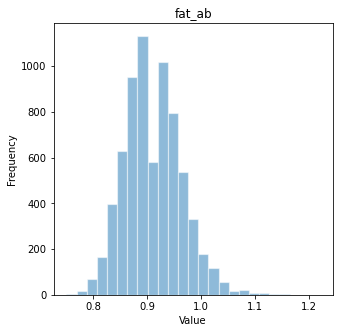

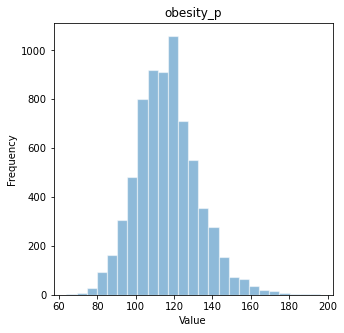

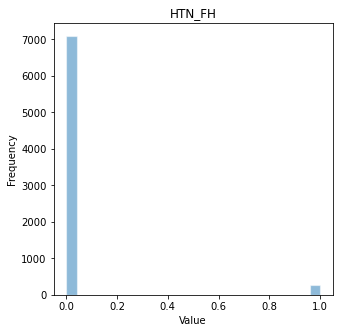

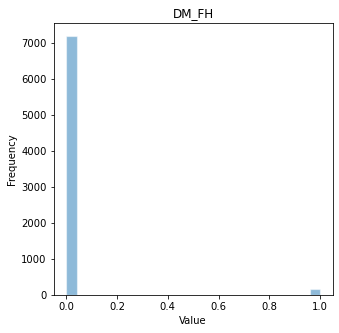

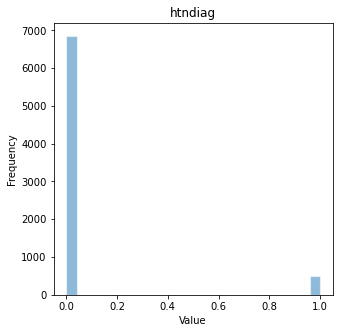

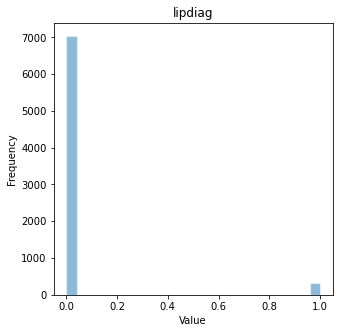

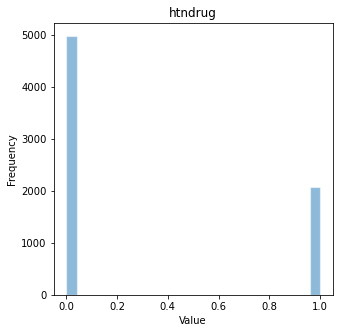

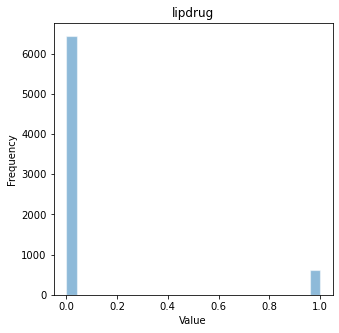

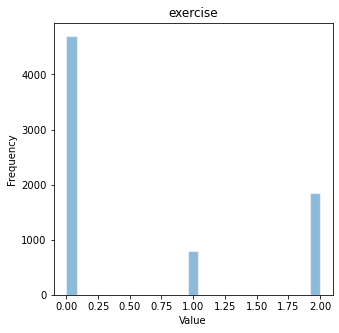

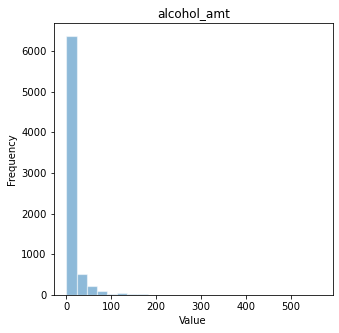

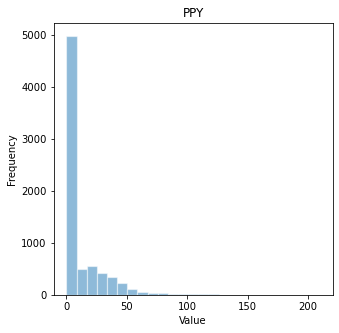

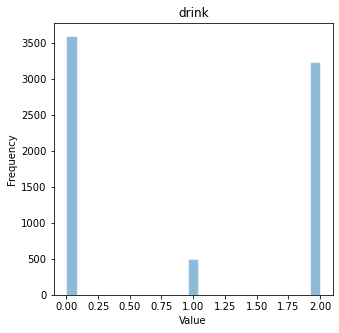

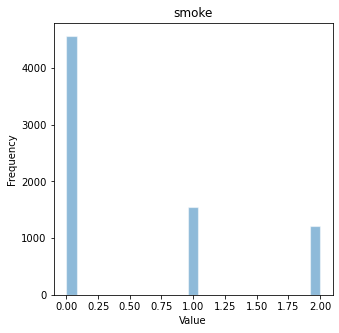

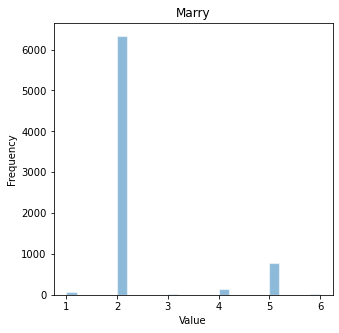

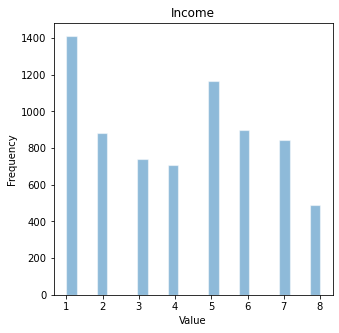

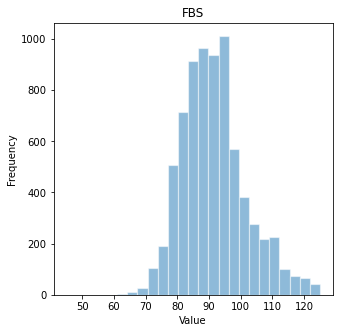

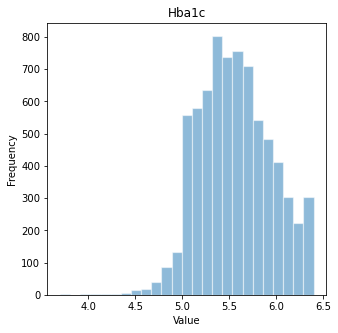

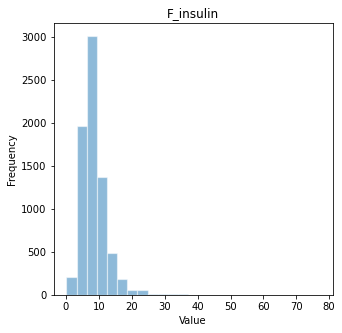

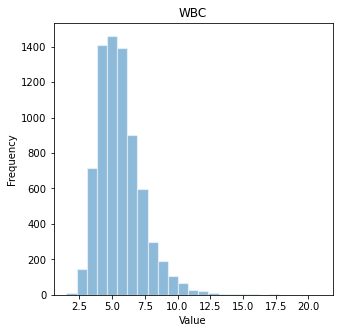

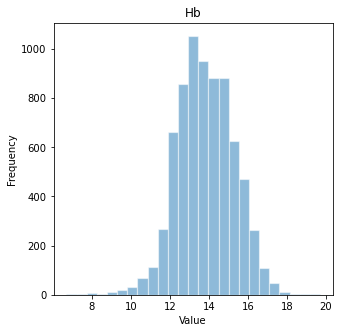

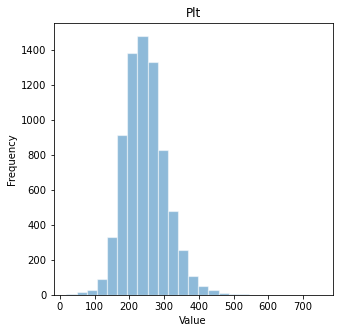

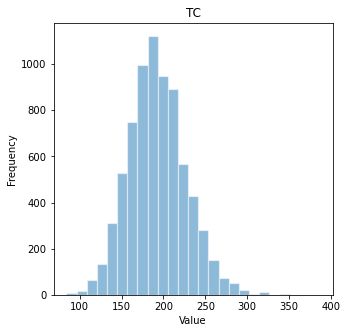

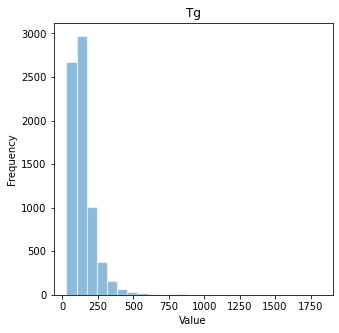

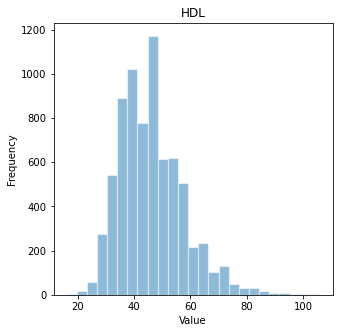

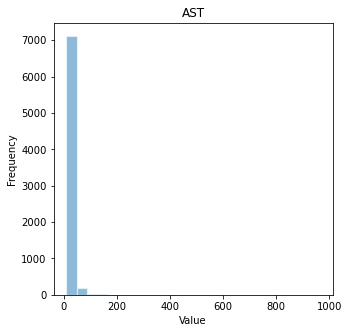

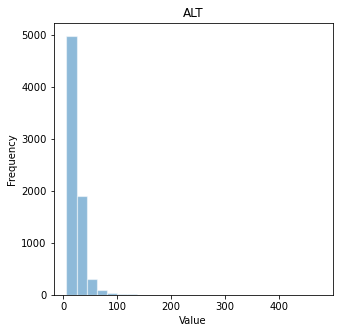

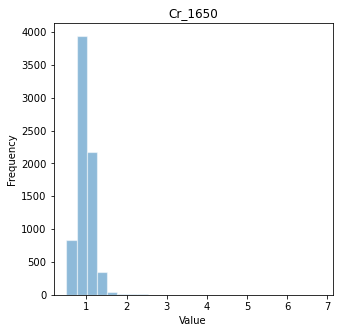

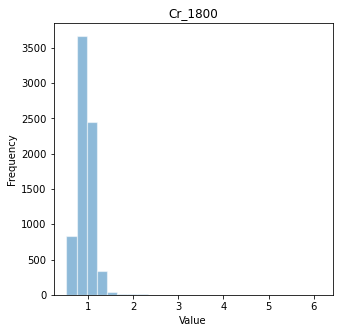

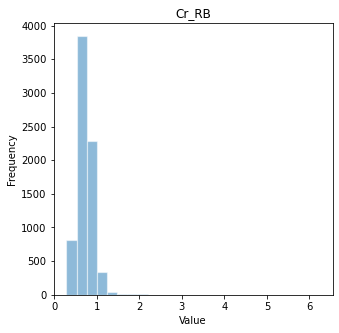

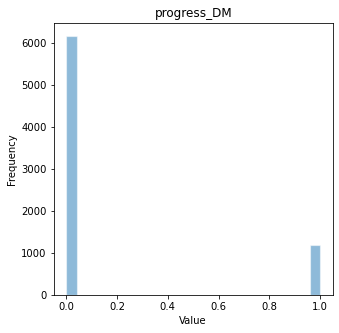

IndexError: index 44 is out of bounds for axis 0 with size 44

<Figure size 360x360 with 0 Axes>

In [50]:
for i in range(0,52):
    plt.figure(figsize=(5,5))
#    plt.subplot(221)
    plt.hist(drop_data[columns[i]].dropna(), bins=25, alpha = 0.5, edgecolor = 'white', linewidth=1.2)#,range = (0,1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(str(columns[i]))
    plt.show()
    #plt.legend()